# Intro

Here is an industry case study from an electrophoresis painting plant where we recently deployed an IIoT system.

There are two related datasets:

* manual inspection records
* IIoT sensor readings

In this case, the data collected from the new installed IIoT system is high resolution but only 15-days measurement periods have not collected sufficient incident events such as equipment failures or maintenance activities. 

The manual inspection records dataset has covered a long period but the quality is low because the original dataset is measured a maximum of 3 times per day and not including weekends and holidays, then upsampled from 3 samples per day to every 30 minutes.

The sensor readings (also called features) have been normalised into range (0,1) to avoid sensitive information from the business while maintaining usability for data analysis. Please note all pressure sensors are normalised together rather than normalised by each individual sensor readings.

Note: feature 'TP2' has not been measured by manual inspection. It's available after we installed the IIoT system.

# Data overview

In [3]:
# lets have a look at both datasets

In [4]:
import pandas as pd
import numpy as np

In [5]:
data_iiot = pd.read_csv('./data/coating_maintenance/iiot_30min_norm.csv')
data_man = pd.read_csv('./data/coating_maintenance/manual_30min_norm.csv')

In [6]:
data_iiot.head()

,TIME,FM1,PE1,PE2,PE3,PE4,TP1,TP2,EPOCH
0,2020-07-05 21:00:00+00:00,0.291841,0.944212,0.969845,0.909817,0.752879,0.128703,0.729592,1593982800
1,2020-07-05 21:30:00+00:00,0.290384,0.947971,0.971459,0.913576,0.753741,0.117572,0.723905,1593984600
2,2020-07-05 22:00:00+00:00,0.279458,0.944138,0.968994,0.912516,0.753187,0.111242,0.720671,1593986400
3,2020-07-05 22:30:00+00:00,0.288927,0.950337,0.976253,0.915991,0.756699,0.102464,0.716186,1593988200
4,2020-07-05 23:00:00+00:00,0.299610,0.950226,0.975747,0.916188,0.756563,0.093201,0.711454,1593990000


In [7]:
# not sure if we need both time and epoch (i am actually sure that we can usse just one of them)

In [8]:
data_iiot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TIME    720 non-null    object 
 1   FM1     720 non-null    float64
 2   PE1     720 non-null    float64
 3   PE2     720 non-null    float64
 4   PE3     720 non-null    float64
 5   PE4     720 non-null    float64
 6   TP1     720 non-null    float64
 7   TP2     720 non-null    float64
 8   EPOCH   720 non-null    int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 50.8+ KB


In [9]:
# no nan values and no problems with types of data

In [10]:
# lets have a look at the distributions
# but first get rid of epoch

In [11]:
data_iiot.drop('EPOCH',axis=1,inplace=True)

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_histograms(data,bins=35):
    numerical_columns = data.select_dtypes(include=['number']).columns

    num_cols = len(numerical_columns)
    num_rows = (num_cols + 2) // 7
    
    # Create subplots
    fig, axes = plt.subplots(num_rows, 7, figsize=(15, 3 * num_rows))
    axes = axes.flatten()
    
    for i, column in enumerate(numerical_columns):
        sns.histplot(data[column], bins=bins, kde=False, ax=axes[i])
        axes[i].set_title(f'{column}')
    
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
        
    plt.tight_layout()
    plt.show()

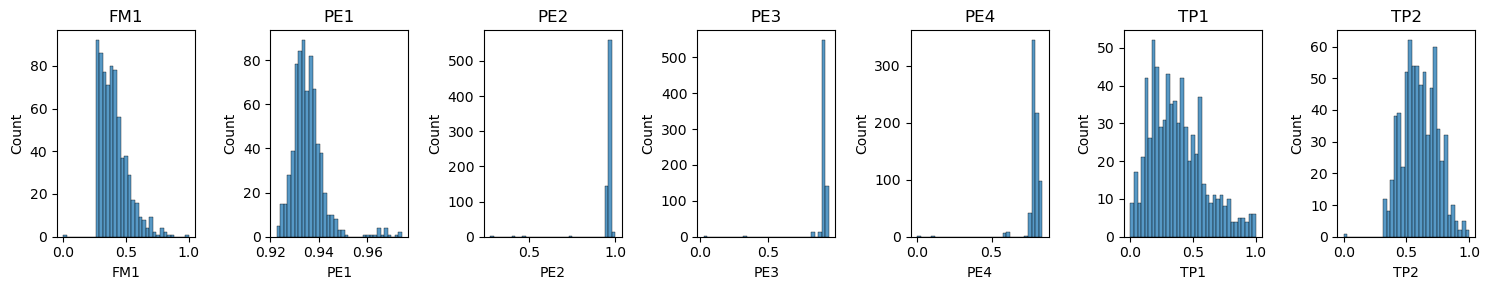

In [13]:
plot_histograms(data_iiot)

In [14]:
# any correlations so far ?

<Axes: >

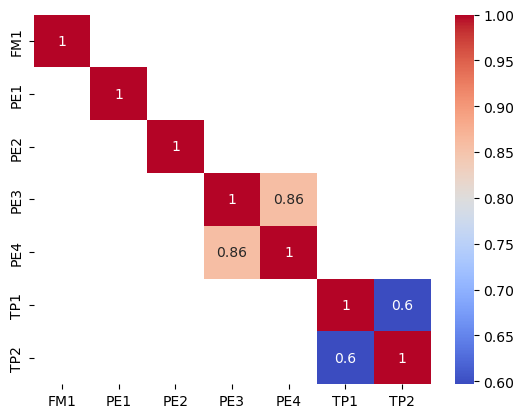

In [15]:
corr_matrix = data_iiot.corr()
sns.heatmap(corr_matrix[corr_matrix >= 0.3],annot=True,cmap='coolwarm')

In [16]:
# I can see that there are correlated feeatures: TP1 and TP2, PE4 and PE3
# reasonable because PE3 and PE4 are pressures for the same elemnt in the machine

In [17]:
# manually collected data

In [18]:
data_man.head() # same about epoch

,TIME,FM1,PE1,PE2,PE3,PE4,TP1,EPOCH
0,16/09/2013 00:00,1.000000,0.538462,0.538462,0.123077,0.123077,0.142857,1379289600
1,16/09/2013 00:30,0.999475,0.538416,0.538416,0.123077,0.122985,0.143787,1379291400
2,16/09/2013 01:00,0.998950,0.538370,0.538370,0.123077,0.122894,0.144717,1379293200
3,16/09/2013 01:30,0.998424,0.538324,0.538324,0.123077,0.122802,0.145647,1379295000
4,16/09/2013 02:00,0.997899,0.538278,0.538278,0.123077,0.122711,0.146577,1379296800


In [19]:
data_man.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110641 entries, 0 to 110640
Data columns (total 8 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   TIME    110641 non-null  object 
 1   FM1     110641 non-null  float64
 2   PE1     110641 non-null  float64
 3   PE2     110641 non-null  float64
 4   PE3     110641 non-null  float64
 5   PE4     110641 non-null  float64
 6   TP1     110641 non-null  float64
 7   EPOCH   110641 non-null  int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 6.8+ MB


In [20]:
# no nan values as well and no TP2 sensor as expected
data_man.drop('EPOCH',axis=1,inplace=True)

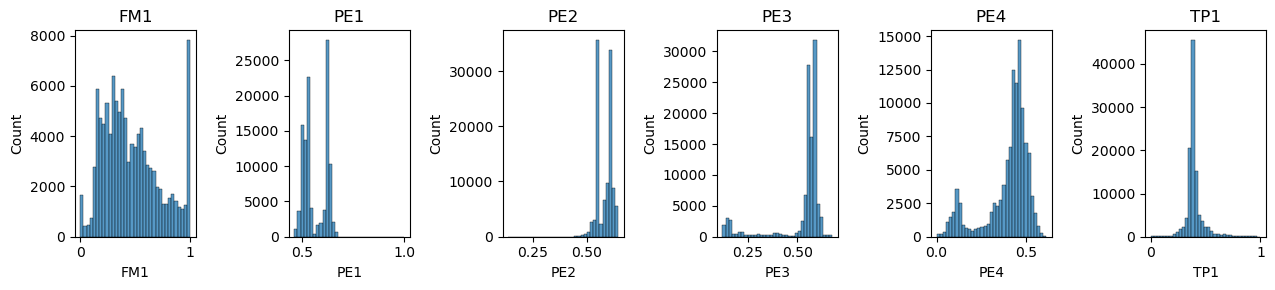

In [21]:
plot_histograms(data_man)

In [22]:
# PE sensors show a bimodal distribution here unlike for iiot data, FM data is more distributed.

<Axes: >

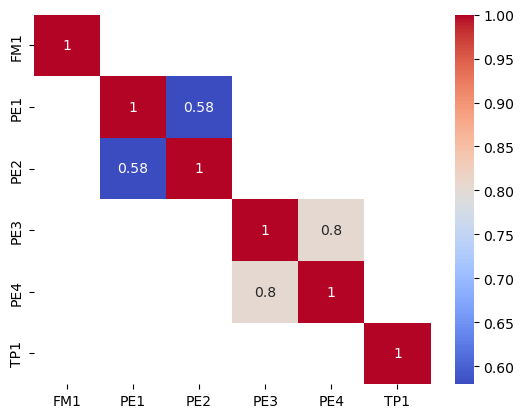

In [23]:
corr_matrix = data_man.corr()
sns.heatmap(corr_matrix[corr_matrix >= 0.3],annot=True,cmap='coolwarm')

In [24]:
# the difference is that there is a correlation for PE2 and PE1 unlike for iiot data

# EDA

In [26]:
data_iiot['TIME'] = pd.to_datetime(data_iiot['TIME'])

In [27]:
data_iiot.set_index('TIME',inplace=True)

In [28]:
def plot_daily_monthly_trends(data):
    # Ensure the index is datetime for resampling
    if not pd.api.types.is_datetime64_any_dtype(data.index):
        raise ValueError("The index of the DataFrame must be datetime-like for resampling.")
    
    monthly_data = data.resample('H').mean()
    daily_data = data.resample('D').mean()

    numerical_columns = data.select_dtypes(include=['number']).columns

    num_cols = len(numerical_columns)
    num_rows = (num_cols + 2) // 1  # 3 plots per row

    fig, axes = plt.subplots(num_rows, 1, figsize=(15, 2 * num_rows))
    axes = axes.flatten()
    
    for i, column in enumerate(numerical_columns):
        sns.lineplot(x=daily_data.index, y=daily_data[column], alpha=0.3, ax=axes[i], label='Daily Avg')
        sns.lineplot(x=monthly_data.index, y=monthly_data[column], ax=axes[i], label='Hourly Avg')
        axes[i].set_title(f'Trend of {column}')
        axes[i].legend()

    # Remove unused subplots if any
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
        
    plt.tight_layout()
    plt.show()

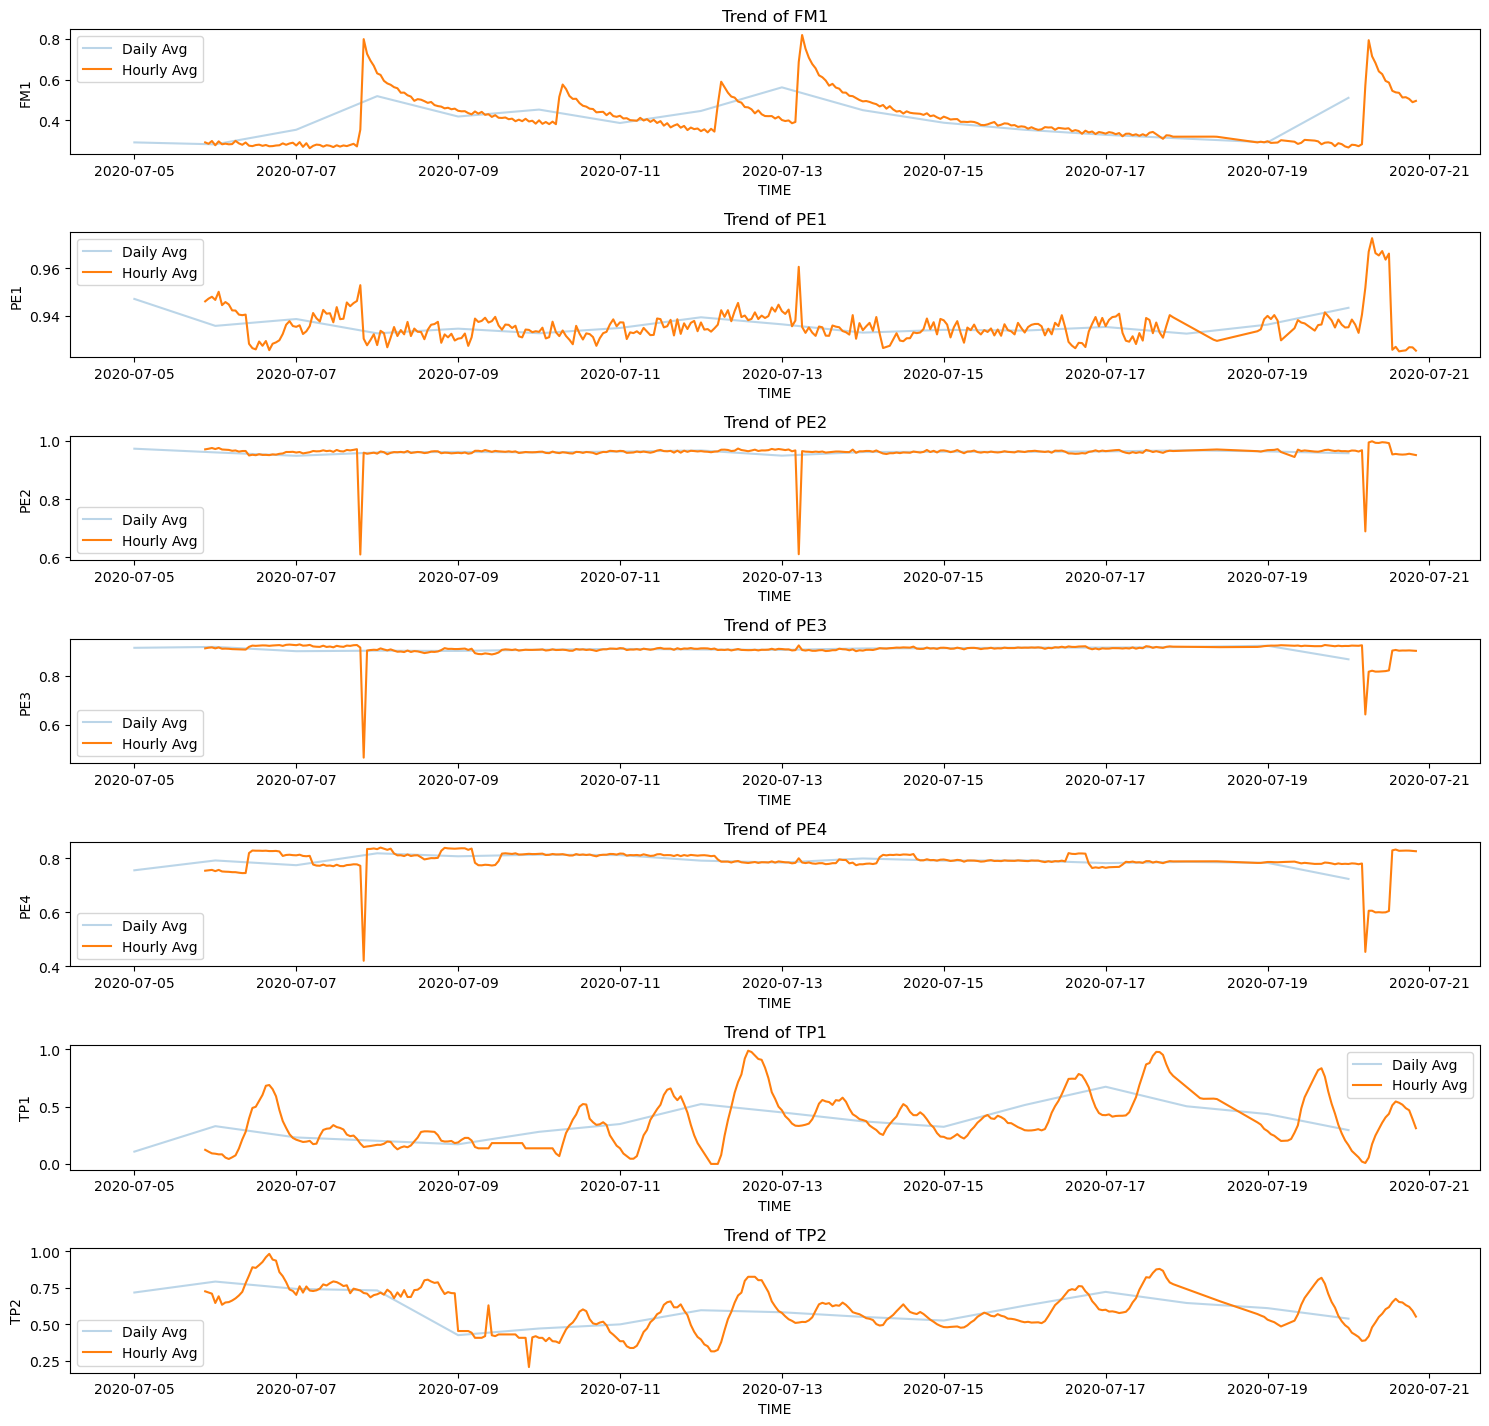

In [29]:
plot_daily_monthly_trends(data_iiot)

In [30]:
# I see pressure change for all sensors at the same moment when FM1 gives a significant and steep increase of its signal

In [31]:
data_man['TIME'] = pd.to_datetime(data_man['TIME'])

In [32]:
data_man.set_index('TIME',inplace=True)

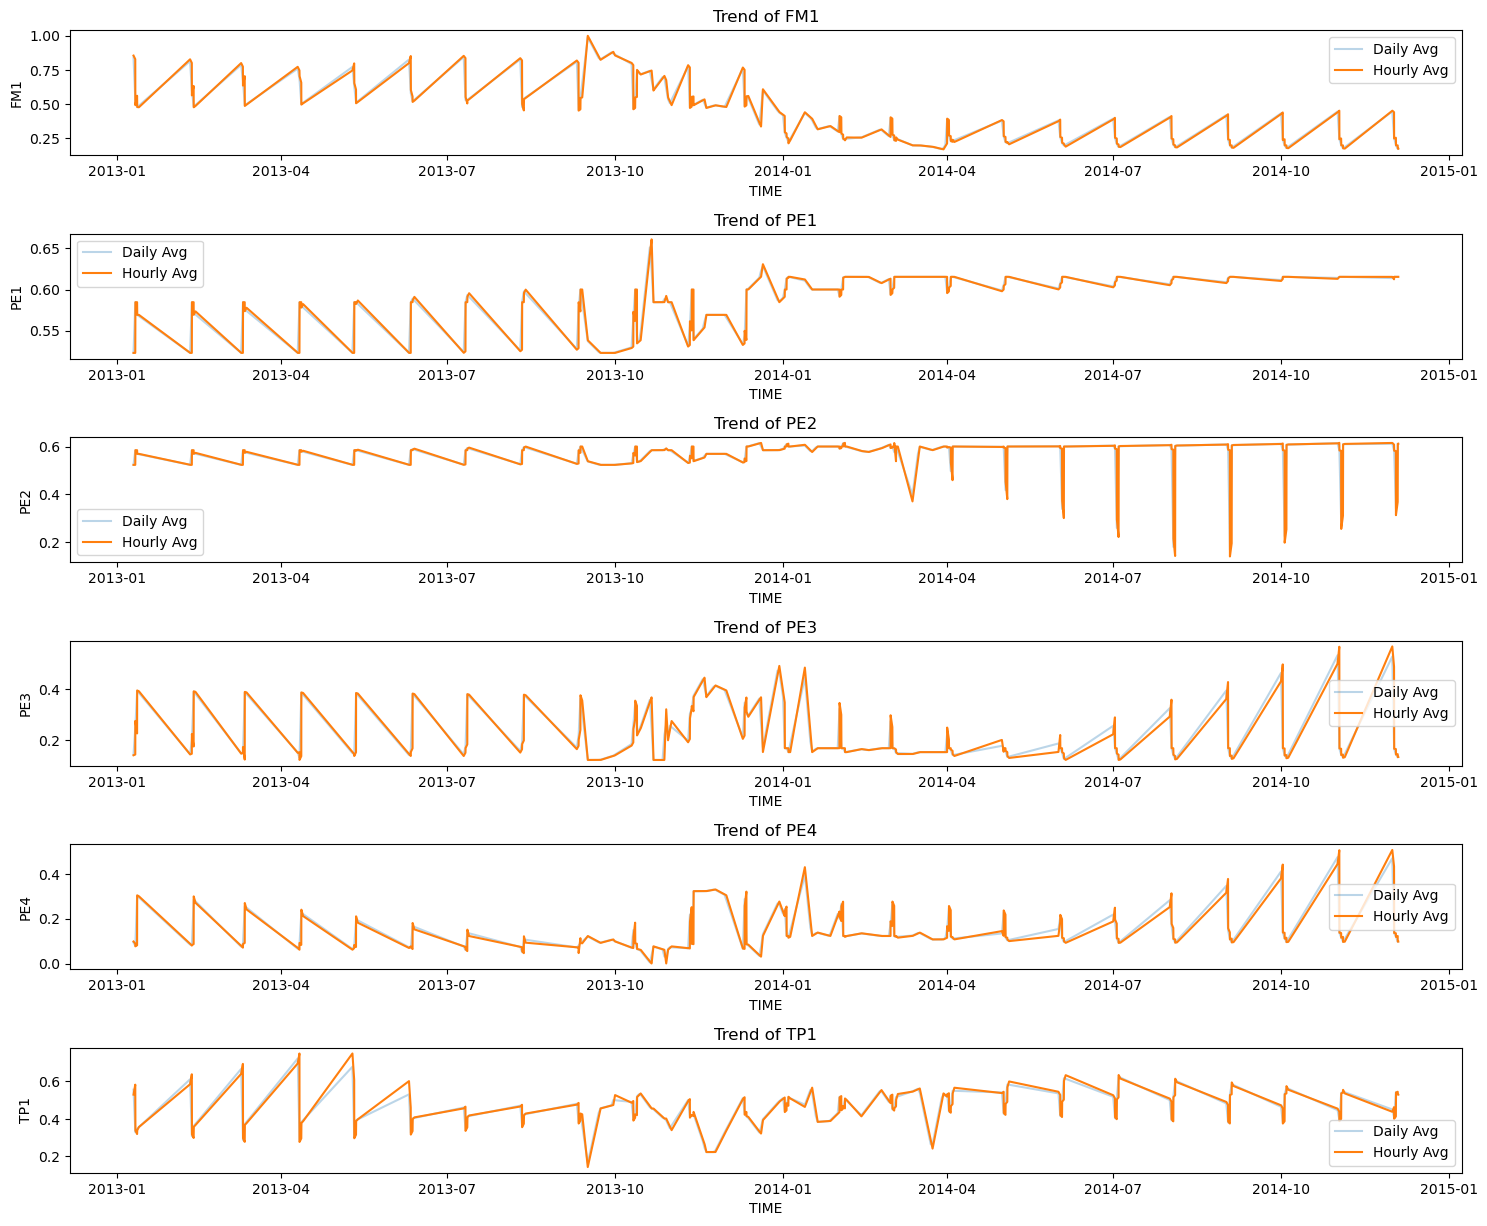

In [33]:
plot_daily_monthly_trends(data_man.iloc[0:10000])

In [34]:
# since there is no clear labels when machine is in a bad or good condition lets work it out orselfs based on the data we are given
# an illustration of the main components of the machine could give a had here

######
<img src="./data/coating_system.png" alt="Alt text" style="width:600px;"><!--

In [36]:
# the iiot data is lack of many detected failures (from the describtion) but manually collected set has more
# There are many possible sources of failures.

# 1. FM1 data can show as some evidences of future failure: for example when the flow drops a lot (may be a problem with filters)
# I can assume from the data that these slow decrease in the FM1 (flow) is a slow dying of a filter (some last longer then others)
# So let us classify it as 'change_filter' (actually we have 3 of them so mb we should classify it for 3 of them, but I guess
# the membrane filter has more influence here)

# 2. Pressure IN and pressure OUT: so pairs of PE1 & PE2, PE3 & PE4
# it might be that a big difference between values in these pairs could be a sign of a filter soon death (Pre-filter I presume)

# 3. very high Temperature can be a sign of future failure too (it might be important to keep pain at the safe temperature to maintain
# the quality etc.)

In [37]:
# my idea is to create a sensor specific set of models that could predict if the machine requires any maintenance 
# (like filter change or temperature check)

In [38]:
# lets try to find possible indicators of problems and classify them ourself first

In [39]:
# LM1

In [40]:
def local_minima_detector(time_series, window_size=81):
    
    time_series = np.array(time_series)
    n = len(time_series)
    
    # Create an array of zeros of the same length as the time series
    minima_array = np.zeros_like(time_series, dtype=int)
    
    # Adjust the window size to make sure it's odd and at least 3
    window_size = max(3, window_size | 1)  # Ensure the window size is odd and at least 3
    half_window = window_size // 2
    
    # Loop through the time series, checking for local minima within the window
    for i in range(half_window, n - half_window):
        window = time_series[i - half_window:i + half_window + 1]
        if time_series[i] == np.min(window) and np.sum(time_series[i] == window) == 1:
            minima_array[i] = 1
    
    return minima_array

In [41]:
minima_FM = local_minima_detector(data_iiot['FM1'])

sensor_FM = pd.DataFrame(data_iiot['FM1'])
sensor_FM['minima'] = minima_FM
sensor_FM.head(2)

,FM1,minima
TIME,,
2020-07-05 21:00:00+00:00,0.291841,0
2020-07-05 21:30:00+00:00,0.290384,0


In [42]:
def plot_time_series_with_marker(data, columns_to_plot, marker_column, marker_value):

    if not pd.api.types.is_datetime64_any_dtype(data.index):
        raise ValueError("The index of the DataFrame must be datetime-like.")
    missing_cols = [col for col in columns_to_plot if col not in data.columns]
    if marker_column not in data.columns:
        missing_cols.append(marker_column)
    
    if missing_cols:
        raise ValueError(f"The following columns are missing from the DataFrame: {missing_cols}")
    

    num_plots = len(columns_to_plot)
    num_rows = (num_plots + 2) // 1
    
    fig, axes = plt.subplots(num_rows, 1, figsize=(15, 2 * num_rows))
    axes = axes.flatten()
    
    for i, column in enumerate(columns_to_plot):
        sns.lineplot(data=data, x=data.index, y=data[column], ax=axes[i], label=column, color='black')
        
        # Mark the broken
        marked_points = data[data[marker_column] == marker_value]
        if not marked_points.empty:
            axes[i].scatter(marked_points.index, marked_points[column], color='red',marker='x', label=f'{marker_column} = change filter')
        
        axes[i].set_title(f'{column} vs Time')
        axes[i].legend()

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

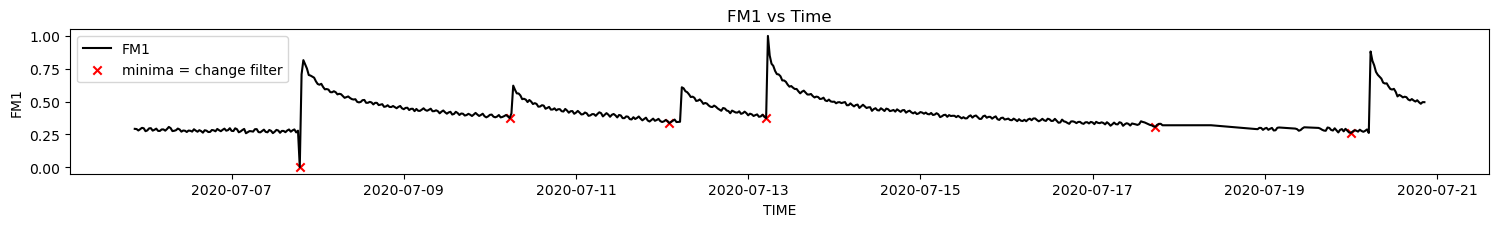

In [43]:
plot_time_series_with_marker(sensor_FM, ['FM1'], 'minima', 1)

In [44]:
# Pressure sensors

In [45]:
import numpy as np

def local_maxima_difference_detector(series1, series2, threshold=1.0, window_size=3):
   

    series1 = np.array(series1)
    series2 = np.array(series2)
    
    # the absolute difference
    abs_difference = np.abs(series1 - series2)
    
    maxima_array = np.zeros_like(abs_difference, dtype=int)
    
    # window size is odd and at least 3
    window_size = max(3, window_size | 1)  # Ensure the window size is odd and at least 3
    half_window = window_size // 2
    
    for i in range(half_window, len(abs_difference) - half_window):
        window = abs_difference[i - half_window:i + half_window + 1]
        
        # threshold
        if abs_difference[i] == np.max(window) and abs_difference[i] > threshold:
            maxima_array[i] = 1
    
    return maxima_array

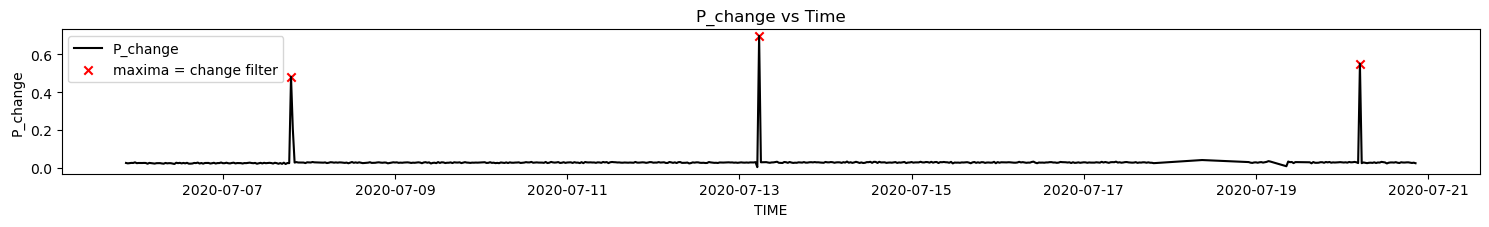

In [46]:
pressure_change = local_maxima_difference_detector(data_iiot['PE1'],data_iiot['PE2'], threshold=0.1)

sensor_P12 = pd.DataFrame(abs(data_iiot['PE2']-data_iiot['PE1']),columns=['P_change'])
sensor_P12['maxima'] = pressure_change
sensor_P12.head(2)

plot_time_series_with_marker(sensor_P12, ['P_change'], 'maxima', 1)

In [47]:
# I can see that prssure sensors indicate some same anomalies as for a flow sensor, biger flow changes, if more precise

In [48]:
# second pair of pressure sensors

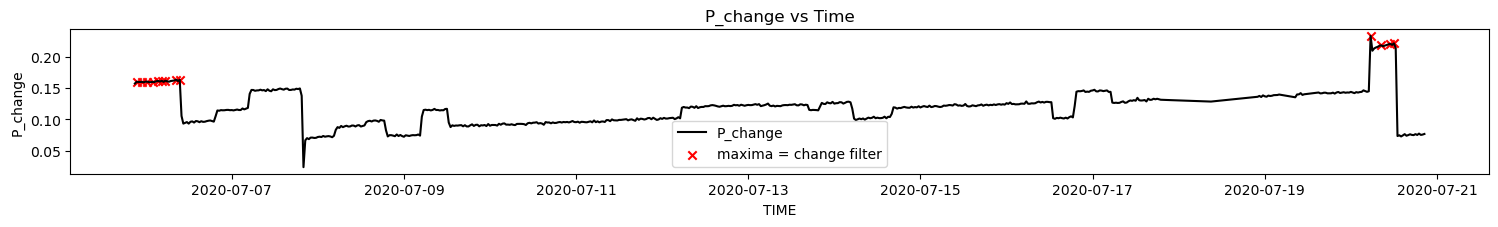

In [110]:
pressure_change = local_maxima_difference_detector(data_iiot['PE3'],data_iiot['PE4'], threshold=0.15)

sensor_P34 = pd.DataFrame(abs(data_iiot['PE3']-data_iiot['PE4']),columns=['P_change'])
sensor_P34['maxima'] = pressure_change
sensor_P34.head(2)

plot_time_series_with_marker(sensor_P34, ['P_change'], 'maxima', 1)

In [104]:
# it is not the same as for the PE1 and PE2, and there is no significant pressure change

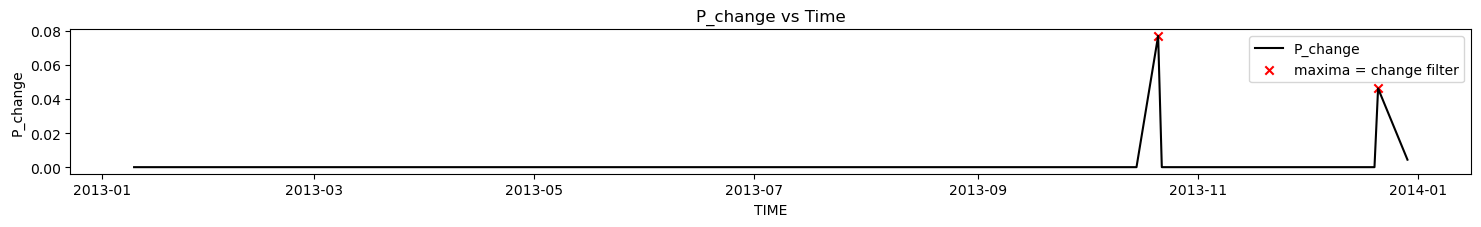

In [160]:
pressure_change_man = local_maxima_difference_detector(data_man.iloc[0:5000]['PE1'],data_man.iloc[0:5000]['PE2'], threshold=0.01)

sensor_P12_man = pd.DataFrame(abs(data_man.iloc[0:5000]['PE1']-data_man.iloc[0:5000]['PE2']),columns=['P_change'])
sensor_P12_man['maxima'] = pressure_change_man
sensor_P12_man.head(2)

plot_time_series_with_marker(sensor_P12_man, ['P_change'], 'maxima', 1)

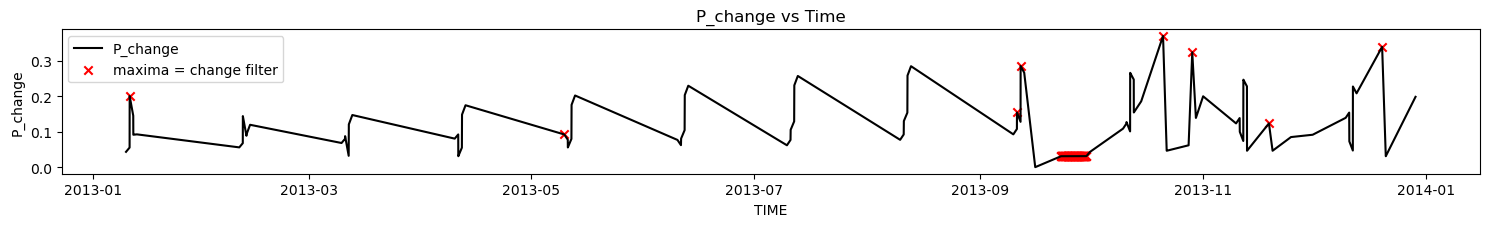

In [162]:
pressure_change_man = local_maxima_difference_detector(data_man.iloc[0:5000]['PE3'],data_man.iloc[0:5000]['PE4'], threshold=0.01)

sensor_P34_man = pd.DataFrame(abs(data_man.iloc[0:5000]['PE3']-data_man.iloc[0:5000]['PE4']),columns=['P_change'])
sensor_P34_man['maxima'] = pressure_change_man
sensor_P34_man.head(2)

plot_time_series_with_marker(sensor_P34_man, ['P_change'], 'maxima', 1)

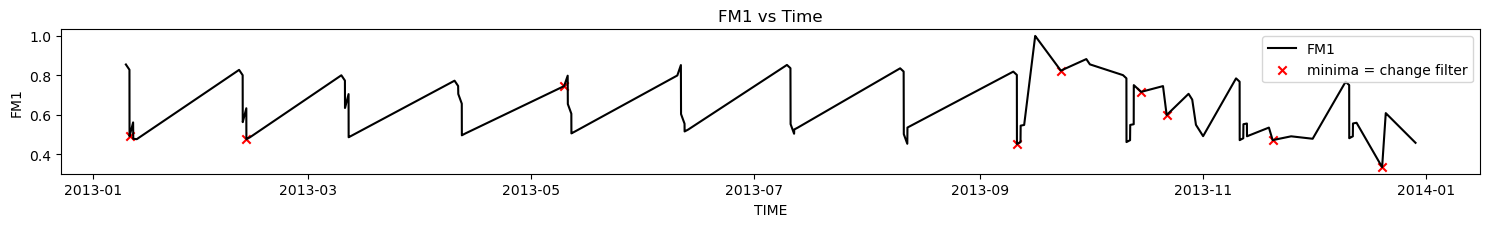

In [166]:
minima_FM_man = local_minima_detector(data_man.iloc[:5000]['FM1'],3)

sensor_FM_man = pd.DataFrame(data_man.iloc[:5000]['FM1'])
sensor_FM_man['minima'] = minima_FM_man
sensor_FM_man.head(2)

plot_time_series_with_marker(sensor_FM_man, ['FM1'], 'minima', 1)

In [170]:
# manuallly collected data shows different bihaviour...
# lets continue with iiot data

In [174]:
# lets have a look at the Temperature sensors

In [208]:
import numpy as np

def local_maxima_average_detector(series1, series2, window_size=3):
    
    series1 = np.array(series1)
    series2 = np.array(series2)
    
    
    avg_series = (series1 + series2) / 2
    maxima_array = np.zeros_like(avg_series, dtype=int)
    
    window_size = max(3, window_size | 1)
    half_window = window_size // 2
    
    for i in range(half_window, len(avg_series) - half_window):
        window = avg_series[i - half_window:i + half_window + 1]
        
        if avg_series[i] == np.max(window) and np.sum(avg_series[i] == window) == 1:
            maxima_array[i] = 1
    
    return maxima_array

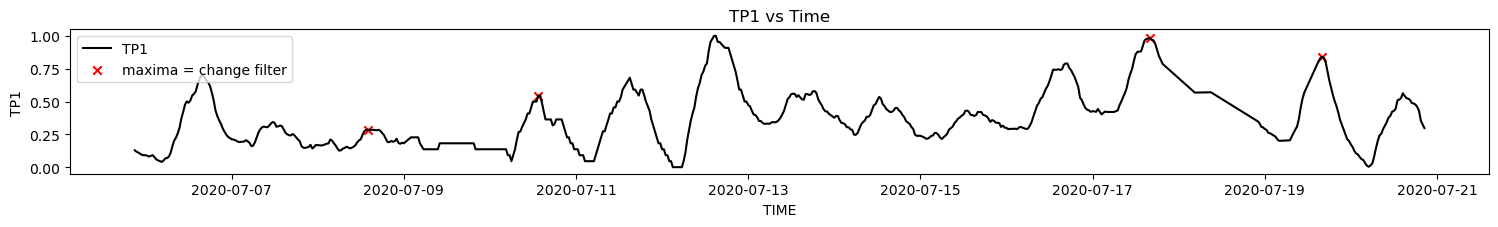

In [210]:
temp_maxima = local_maxima_average_detector(data_iiot['TP1'],data_iiot['TP2'],85)

sensor_T = pd.DataFrame(data_iiot['TP1'])
sensor_T['maxima'] = temp_maxima
sensor_T.head(2)

plot_time_series_with_marker(sensor_T, ['TP1'], 'maxima', 1)

In [226]:
def local_maxima_average_detector(series1, series2, threshold=1.0, window_size=3):
    series1 = np.array(series1)
    series2 = np.array(series2)
    
    avg_series = (series1 + series2) / 2
    
    maxima_array = np.zeros_like(avg_series, dtype=int)
    
    window_size = max(3, window_size | 1)
    half_window = window_size // 2
    
    for i in range(half_window, len(avg_series) - half_window):
        window = avg_series[i - half_window:i + half_window + 1]
        
        if (avg_series[i] == np.max(window) and np.sum(avg_series[i] == window) == 1 and
            (avg_series[i] - avg_series[i - 1] > threshold) and (avg_series[i] - avg_series[i + 1] > threshold)):
            maxima_array[i] = 1
    
    return maxima_array

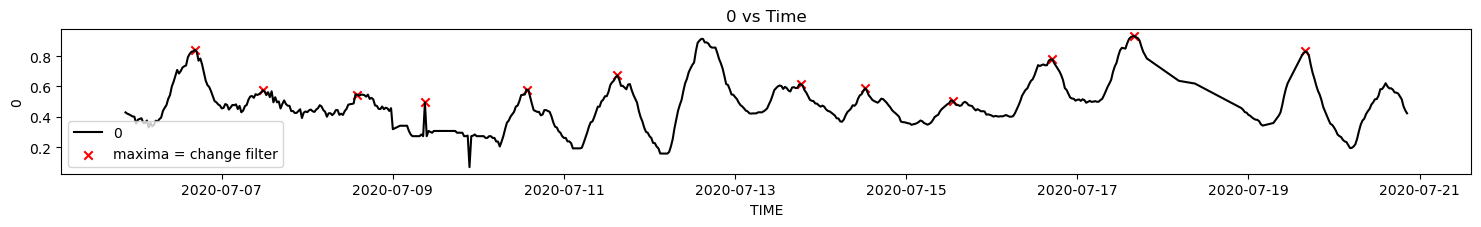

In [236]:
temp_maxima = local_maxima_average_detector(data_iiot['TP1'],data_iiot['TP2'],0.00001,35)

sensor_T = pd.DataFrame((data_iiot['TP1']+data_iiot['TP2'])/2)
sensor_T['maxima'] = temp_maxima
sensor_T.head(2)

plot_time_series_with_marker(sensor_T, [0], 'maxima', 1)

In [285]:
window_size = 30
data_iiot['FM_rolling_mean'] = data_iiot['FM1'].rolling(window=window_size).mean()
data_iiot['FM_rolling_std'] = data_iiot['FM1'].rolling(window=window_size).std()
data_iiot['FM_lag_1'] = data_iiot['FM1'].shift(1)
data_iiot['FM_differenced'] = data_iiot['FM1'].diff()

In [283]:
# Rolling Mean smooths the data and helps identify long-term trends
# Rolling Standard Deviation captures volatility or variability over time.
# lag features to capture temporal relationships between past values and current values
# Differencing is used to remove trends and stabilize the data, particularly for cyclic or periodic behaviors.

<Axes: xlabel='TIME', ylabel='FM_rolling_mean'>

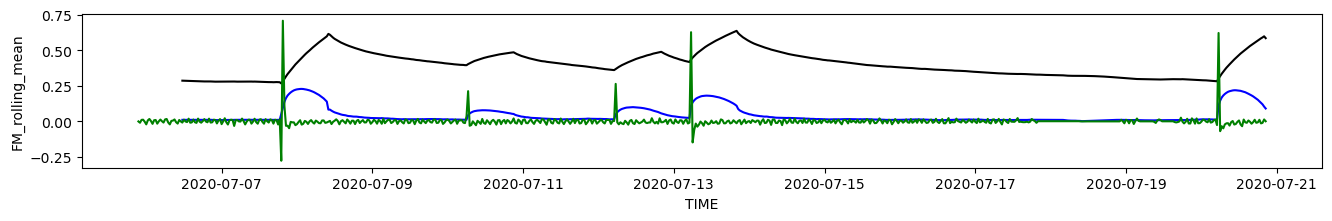

In [287]:
plt.figure(figsize=(16,2))
sns.lineplot(data_iiot,x=data_iiot.index,y=data_iiot['FM_rolling_mean'],color='black')
sns.lineplot(data_iiot,x=data_iiot.index,y=data_iiot['FM_rolling_std'],color='blue')
# sns.lineplot(data_iiot,x=data_iiot.index,y=data_iiot['FM_lag_1'],color='red')
sns.lineplot(data_iiot,x=data_iiot.index,y=data_iiot['FM_differenced'],color='green')

In [289]:
# STL Decomposition breaks down the time series into trend, seasonality, and residual components, 
# making it easier to spot cyclic behaviors

In [291]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
decomposition = seasonal_decompose(data_iiot['FM1'], model='additive', period=24)
data_iiot['FM1_trend'] = decomposition.trend
data_iiot['FM1_seasonal'] = decomposition.seasonal
data_iiot['FM1_residual'] = decomposition.resid

<Axes: xlabel='TIME', ylabel='FM1_trend'>

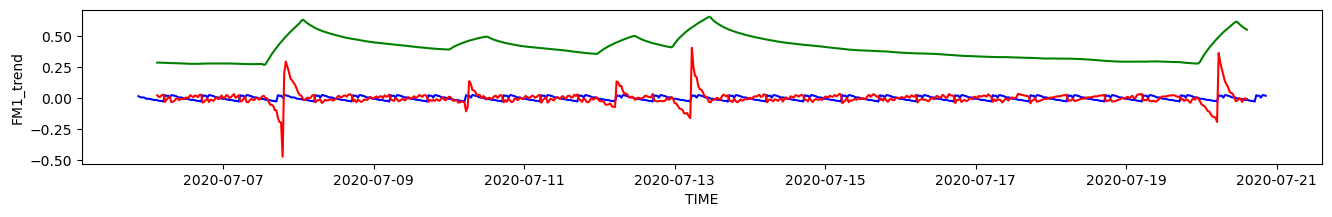

In [299]:
plt.figure(figsize=(16,2))
sns.lineplot(data_iiot,x=data_iiot.index,y=data_iiot['FM1_trend'],color='green')
sns.lineplot(data_iiot,x=data_iiot.index,y=data_iiot['FM1_seasonal'],color='blue')
sns.lineplot(data_iiot,x=data_iiot.index,y=data_iiot['FM1_residual'],color='red')

In [ ]:
# The Fast Fourier Transform (FFT) converts a time-domain signal into its constituent frequencies, 
# which can reveal periodic behaviors or anomalies at specific frequency bands.

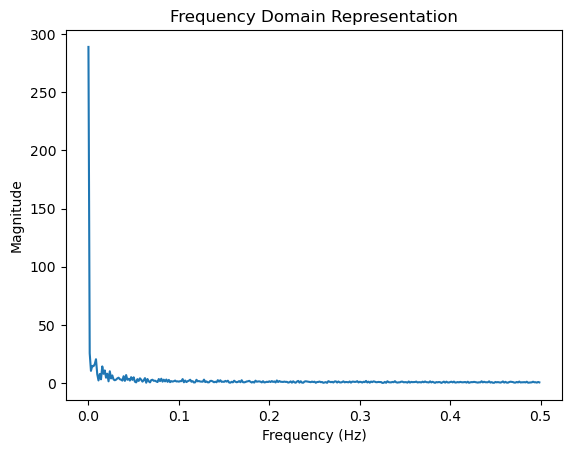

In [321]:
from scipy.fft import fft


N = len(data_iiot['FM1'])
T = 1.0 / 1  # Sampling interval


fft_values = fft(data_iiot['FM1'].values)
fft_frequencies = np.fft.fftfreq(N, T)
magnitude = np.abs(fft_values)

plt.plot(fft_frequencies[:N // 2], magnitude[:N // 2])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Frequency Domain Representation')
plt.show()

In [ ]:
# Wavelet Transform allows for time-frequency analysis, making it suitable for detecting anomalies 
# that are localized in time (e.g., short bursts of unusual behavior)

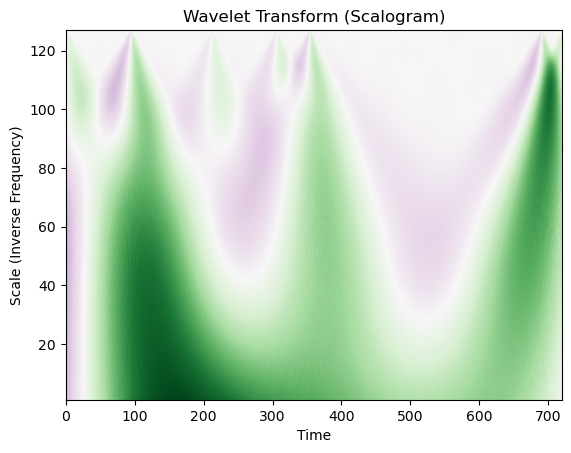

In [323]:
import pywt

scales = np.arange(1, 128)  # range of scales
coef, freqs = pywt.cwt(data_iiot['FM1'], scales, 'mexh')

# scalogram (time-frequency representation)
plt.imshow(coef, extent=[0, N, scales.min(), scales.max()], cmap='PRGn', aspect='auto',
           vmax=abs(coef).max(), vmin=-abs(coef).max())
plt.xlabel('Time')
plt.ylabel('Scale (Inverse Frequency)')
plt.title('Wavelet Transform (Scalogram)')
plt.show()

In [331]:
# data_iiot.head()

In [329]:
data_iiot_FM = data_iiot.copy()
data_iiot_FM.drop(['PE1','PE2','PE3','PE4','TP1','TP2'],axis=1,inplace=True)
data_iiot_FM.head()

,FM1,FM_rolling_mean,FM_rolling_std,FM_lag_1,FM_differenced,FM1_trend,FM1_seasonal,FM1_residual
TIME,,,,,,,,
2020-07-05 21:00:00+00:00,0.291841,NaN,NaN,NaN,NaN,NaN,0.016292,NaN
2020-07-05 21:30:00+00:00,0.290384,NaN,NaN,0.291841,-0.001457,NaN,0.009186,NaN
2020-07-05 22:00:00+00:00,0.279458,NaN,NaN,0.290384,-0.010926,NaN,0.005515,NaN
2020-07-05 22:30:00+00:00,0.288927,NaN,NaN,0.279458,0.009469,NaN,0.006156,NaN
2020-07-05 23:00:00+00:00,0.299610,NaN,NaN,0.288927,0.010683,NaN,0.003073,NaN


In [333]:
data_iiot_FM.isna().sum()

FM1                 0
FM_rolling_mean    29
FM_rolling_std     29
FM_lag_1            1
FM_differenced      1
FM1_trend          24
FM1_seasonal        0
FM1_residual       24
dtype: int64

In [335]:
data_iiot_FM.dropna(inplace=True)

In [358]:
from sklearn.ensemble import IsolationForest

isolation_forest = IsolationForest(contamination=0.04)
isolation_forest.fit(data_iiot_FM)

# Predict anomalies (-1 means anomaly, 1 means normal)
y_pred = isolation_forest.predict(data_iiot_FM)
y_pred_binary = np.where(y_pred == -1, 1, 0)

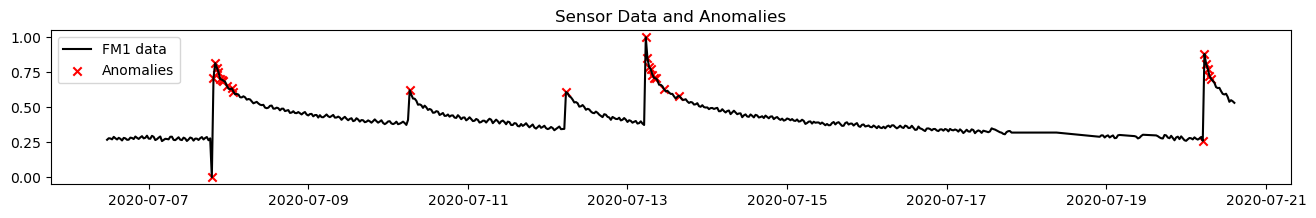

In [360]:
plt.figure(figsize=(16, 2))
plt.plot(data_iiot_FM.index, data_iiot_FM['FM1'], label='FM1 data', color='black')
# plt.plot(data_iiot_FM.index, df_train['sensor_1_rolling_avg'], label='Moving Avg (Sensor 1)', color='yellow')

anomaly_indices = np.where(y_pred_binary == 1)[0]  # Get the time steps where failures are predicted
plt.scatter(data_iiot_FM.iloc[anomaly_indices].index, 
            [y_pred_binary[i] for i in anomaly_indices] * data_iiot_FM['FM1'].iloc[anomaly_indices], 
            color='red', label='Anomalies', marker='x')
# plt.scatter(df_train.index, y_pred_binary * df_train['sensor_1'], color='red', marker='x', label='Anomalies')
plt.title('Sensor Data and Anomalies')
plt.legend()
plt.show()

In [364]:
data_iiot_PE12 = pd.DataFrame(abs(data_iiot['PE1']-data_iiot['PE2']),columns=['PE12'])

In [368]:
data_iiot_PE12.head()

,PE12
TIME,
2020-07-05 21:00:00+00:00,0.025633
2020-07-05 21:30:00+00:00,0.023488
2020-07-05 22:00:00+00:00,0.024856
2020-07-05 22:30:00+00:00,0.025916
2020-07-05 23:00:00+00:00,0.025522


In [370]:
window_size = 30
data_iiot_PE12['PE12_rolling_mean'] = data_iiot_PE12['PE12'].rolling(window=window_size).mean()
data_iiot_PE12['PE12_rolling_std'] = data_iiot_PE12['PE12'].rolling(window=window_size).std()
data_iiot_PE12['PE12_lag_1'] = data_iiot_PE12['PE12'].shift(1)
data_iiot_PE12['PE12_differenced'] = data_iiot_PE12['PE12'].diff()

<Axes: xlabel='TIME', ylabel='PE12_rolling_mean'>

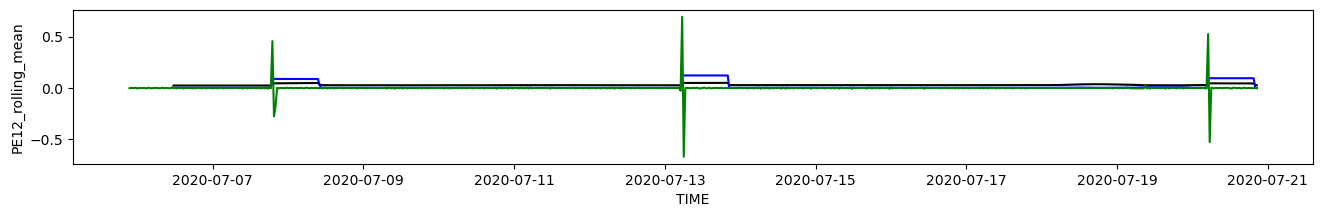

In [372]:
plt.figure(figsize=(16,2))
sns.lineplot(data_iiot_PE12,x=data_iiot_PE12.index,y=data_iiot_PE12['PE12_rolling_mean'],color='black')
sns.lineplot(data_iiot_PE12,x=data_iiot_PE12.index,y=data_iiot_PE12['PE12_rolling_std'],color='blue')
sns.lineplot(data_iiot_PE12,x=data_iiot_PE12.index,y=data_iiot_PE12['PE12_differenced'],color='green')

In [374]:
decomposition = seasonal_decompose(data_iiot_PE12['PE12'], model='additive', period=24)
data_iiot_PE12['PE12_trend'] = decomposition.trend
data_iiot_PE12['PE12_seasonal'] = decomposition.seasonal
data_iiot_PE12['PE12_residual'] = decomposition.resid

<Axes: xlabel='TIME', ylabel='PE12_trend'>

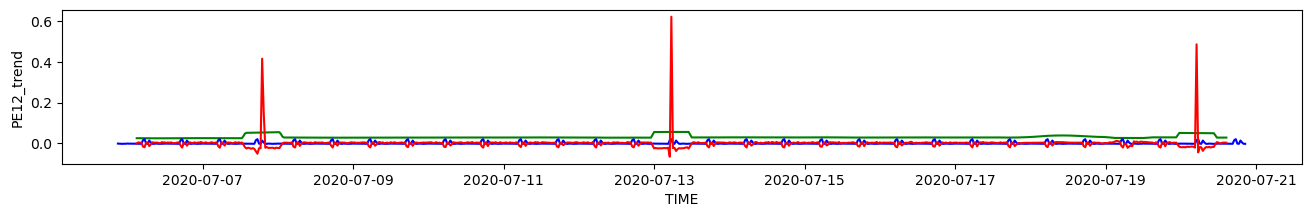

In [376]:
plt.figure(figsize=(16,2))
sns.lineplot(data_iiot_PE12,x=data_iiot_PE12.index,y=data_iiot_PE12['PE12_trend'],color='green')
sns.lineplot(data_iiot_PE12,x=data_iiot_PE12.index,y=data_iiot_PE12['PE12_seasonal'],color='blue')
sns.lineplot(data_iiot_PE12,x=data_iiot_PE12.index,y=data_iiot_PE12['PE12_residual'],color='red')

In [380]:
data_iiot_PE12.dropna(inplace=True)

In [386]:
isolation_forest_PE12 = IsolationForest(contamination=0.01)
isolation_forest_PE12.fit(data_iiot_PE12)

# Predict anomalies (-1 means anomaly, 1 means normal)
y_pred = isolation_forest_PE12.predict(data_iiot_PE12)
y_pred_binary = np.where(y_pred == -1, 1, 0)

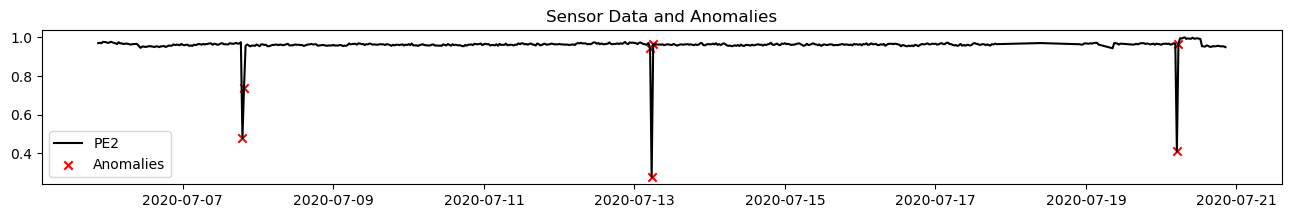

In [398]:
plt.figure(figsize=(16, 2))
plt.plot(data_iiot.index, data_iiot['PE2'], label='PE2', color='black')
# plt.plot(data_iiot_FM.index, df_train['sensor_1_rolling_avg'], label='Moving Avg (Sensor 1)', color='yellow')

anomaly_indices = np.where(y_pred_binary == 1)[0]  # Get the time steps where failures are predicted
plt.scatter(data_iiot.iloc[anomaly_indices+29].index, 
            [y_pred_binary[i] for i in anomaly_indices] * data_iiot['PE2'].iloc[anomaly_indices+29], 
            color='red', label='Anomalies', marker='x')
# plt.scatter(df_train.index, y_pred_binary * df_train['sensor_1'], color='red', marker='x', label='Anomalies')
plt.title('Sensor Data and Anomalies')
plt.legend()
plt.show()

In [400]:
data_iiot_TP12 = pd.DataFrame((data_iiot['TP1']+data_iiot['TP2'])/2, columns=['TP12'])

In [402]:
window_size = 30
data_iiot_TP12['TP12_rolling_mean'] = data_iiot_TP12['TP12'].rolling(window=window_size).mean()
data_iiot_TP12['TP12_rolling_std'] = data_iiot_TP12['TP12'].rolling(window=window_size).std()
data_iiot_TP12['TP12_lag_1'] = data_iiot_TP12['TP12'].shift(1)
data_iiot_TP12['TP12_differenced'] = data_iiot_TP12['TP12'].diff()

<Axes: xlabel='TIME', ylabel='TP12_rolling_mean'>

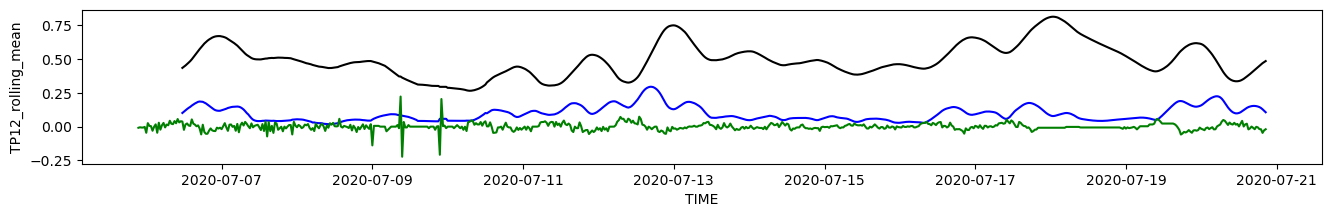

In [404]:
plt.figure(figsize=(16,2))
sns.lineplot(data_iiot_TP12,x=data_iiot_TP12.index,y=data_iiot_TP12['TP12_rolling_mean'],color='black')
sns.lineplot(data_iiot_TP12,x=data_iiot_TP12.index,y=data_iiot_TP12['TP12_rolling_std'],color='blue')
sns.lineplot(data_iiot_TP12,x=data_iiot_TP12.index,y=data_iiot_TP12['TP12_differenced'],color='green')

In [406]:
decomposition = seasonal_decompose(data_iiot_TP12['TP12'], model='additive', period=24)
data_iiot_TP12['TP12_trend'] = decomposition.trend
data_iiot_TP12['TP12_seasonal'] = decomposition.seasonal
data_iiot_TP12['TP12_residual'] = decomposition.resid

<Axes: xlabel='TIME', ylabel='TP12_trend'>

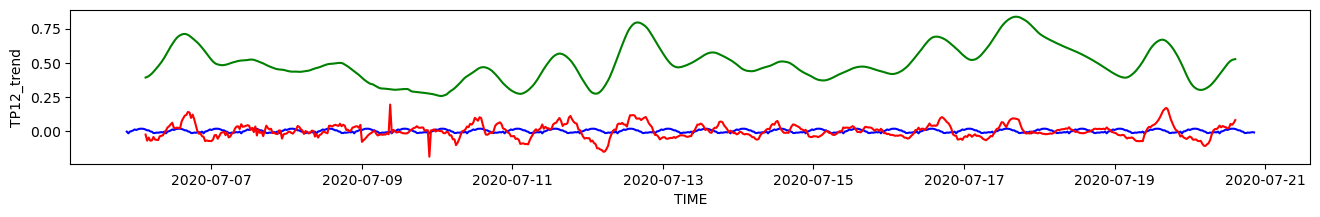

In [408]:
plt.figure(figsize=(16,2))
sns.lineplot(data_iiot_TP12,x=data_iiot_TP12.index,y=data_iiot_TP12['TP12_trend'],color='green')
sns.lineplot(data_iiot_TP12,x=data_iiot_TP12.index,y=data_iiot_TP12['TP12_seasonal'],color='blue')
sns.lineplot(data_iiot_TP12,x=data_iiot_TP12.index,y=data_iiot_TP12['TP12_residual'],color='red')

In [412]:
data_iiot_TP12.dropna(inplace=True)

In [426]:
isolation_forest_TP12 = IsolationForest(contamination=0.04)
isolation_forest_TP12.fit(data_iiot_TP12)

# Predict anomalies (-1 means anomaly, 1 means normal)
y_pred = isolation_forest_TP12.predict(data_iiot_TP12)
y_pred_binary = np.where(y_pred == -1, 1, 0)

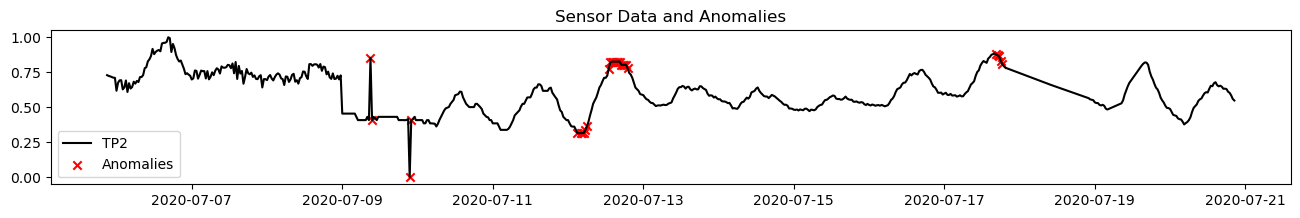

In [432]:
plt.figure(figsize=(16, 2))
plt.plot(data_iiot.index, data_iiot['TP2'], label='TP2', color='black')
# plt.plot(data_iiot_FM.index, df_train['sensor_1_rolling_avg'], label='Moving Avg (Sensor 1)', color='yellow')

anomaly_indices = np.where(y_pred_binary == 1)[0]  # Get the time steps where failures are predicted
plt.scatter(data_iiot.iloc[anomaly_indices+29].index, 
            [y_pred_binary[i] for i in anomaly_indices] * data_iiot['TP2'].iloc[anomaly_indices+29], 
            color='red', label='Anomalies', marker='x')
# plt.scatter(df_train.index, y_pred_binary * df_train['sensor_1'], color='red', marker='x', label='Anomalies')
plt.title('Sensor Data and Anomalies')
plt.legend()
plt.show()

# Results of this work:

I built a model that predicts anomalies corresponding to time when filter change is required or future overheating.